In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import decomposition
import numpy as np
from matplotlib.pyplot import plot, show, title

In [2]:
mnist = load_digits()
X_mnist = mnist.data
Y_mnist = mnist.target
pca_mnist = decomposition.PCA(n_components=3).fit(X_mnist)
X_mnist_reduced = pca_mnist.transform(X_mnist)

k = 1:	accuracy = 0.7277777777777777
k = 2:	accuracy = 0.725
k = 3:	accuracy = 0.7638888888888888
k = 4:	accuracy = 0.7638888888888888
k = 5:	accuracy = 0.7527777777777778
k = 6:	accuracy = 0.7777777777777778
k = 7:	accuracy = 0.7888888888888889
k = 8:	accuracy = 0.8
k = 9:	accuracy = 0.7861111111111111
k = 10:	accuracy = 0.775
k = 11:	accuracy = 0.7833333333333333
k = 12:	accuracy = 0.7805555555555556
k = 13:	accuracy = 0.7888888888888889
k = 14:	accuracy = 0.7944444444444444
k = 15:	accuracy = 0.7972222222222223
k = 16:	accuracy = 0.7916666666666666
k = 17:	accuracy = 0.7861111111111111
k = 18:	accuracy = 0.775
k = 19:	accuracy = 0.775
k = 20:	accuracy = 0.7833333333333333
k = 21:	accuracy = 0.7805555555555556
k = 22:	accuracy = 0.7777777777777778
k = 23:	accuracy = 0.775
k = 24:	accuracy = 0.7722222222222223
k = 25:	accuracy = 0.7694444444444445
k = 26:	accuracy = 0.7722222222222223
k = 27:	accuracy = 0.7722222222222223
k = 28:	accuracy = 0.7694444444444445
k = 29:	accuracy = 0.7666

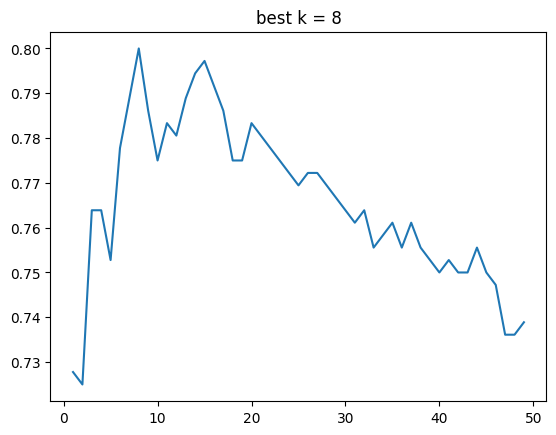

In [3]:
X_mnist_train, X_mnist_test, Y_mnist_train, Y_mnist_test = train_test_split(X_mnist_reduced, Y_mnist, test_size=0.20, random_state=42)
N = 50
accuracy = np.zeros((N,))
for k in range(1, N):
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_mnist_train, Y_mnist_train).predict(X_mnist_test)
    accuracy[k] = accuracy_score(Y_pred, Y_mnist_test)
    print(f"k = {k}:\taccuracy = {accuracy[k]}")
plot(range(1, N), accuracy[1:])
title(f"best k = {np.argmax(accuracy)}")
show()

"Naiwne" znalezienie "najlepszego" $k$:

In [4]:
trials = 10
N = 50
wins = np.zeros((N,))
total_accuracy = wins.copy()
for _ in range(trials):
    X_mnist_train, X_mnist_test, Y_mnist_train, Y_mnist_test = train_test_split(X_mnist_reduced, Y_mnist, test_size=0.20)
    accuracy = np.zeros((N,))
    for k in range(1, N):
        Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_mnist_train, Y_mnist_train).predict(X_mnist_test)
        accuracy[k] = accuracy_score(Y_pred, Y_mnist_test)
    total_accuracy += accuracy
    wins[np.argmax(accuracy)] += 1

most_wins = np.argmax(wins)
best_accuracy = np.argmax(total_accuracy)
print(f"most wins: {most_wins}")
print(f"best acc: {best_accuracy} ({total_accuracy[best_accuracy] / trials})")

most wins: 12
best acc: 14 (0.7855555555555556)


Bardziej systematyczny sposób: https://scikit-learn.org/stable/modules/cross_validation.html